In [1]:
import seaborn as sns
import os
import sys
# add local lib to sys path for relative import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import vis
from src.log.common import read_pickle, TensorType
import re
df = read_pickle('../test-data/numerics_df_v3.pkl')

# Facet a Single Layer (module) over TensorType

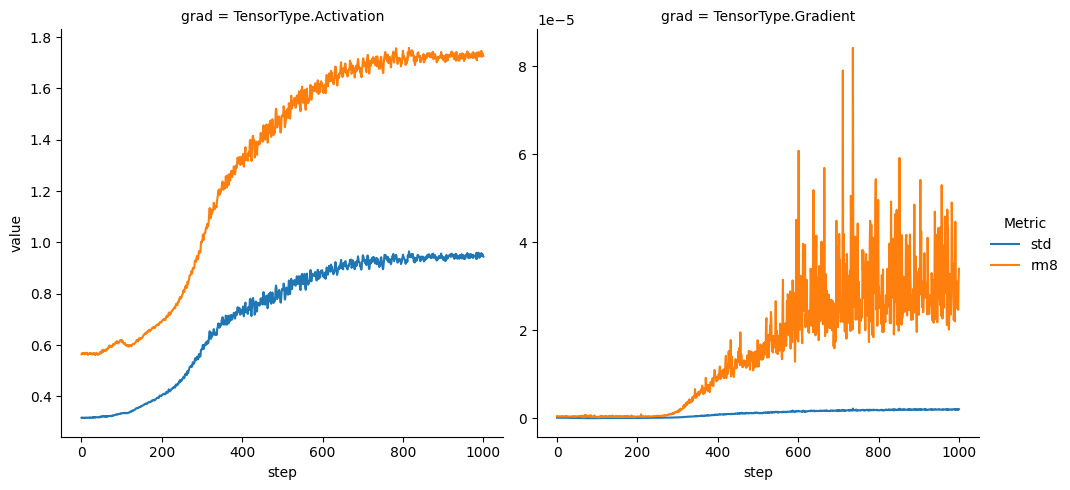

In [2]:
fg = vis.scalar_line(
    df=df,
    layer='layers.3.attention.wq',
    tt=None, 
    scalar_metric=['std', 'rm8'],
    kind='line'
)

# Single Metric, Facet on layer_name (a.k.a modue name) via regex

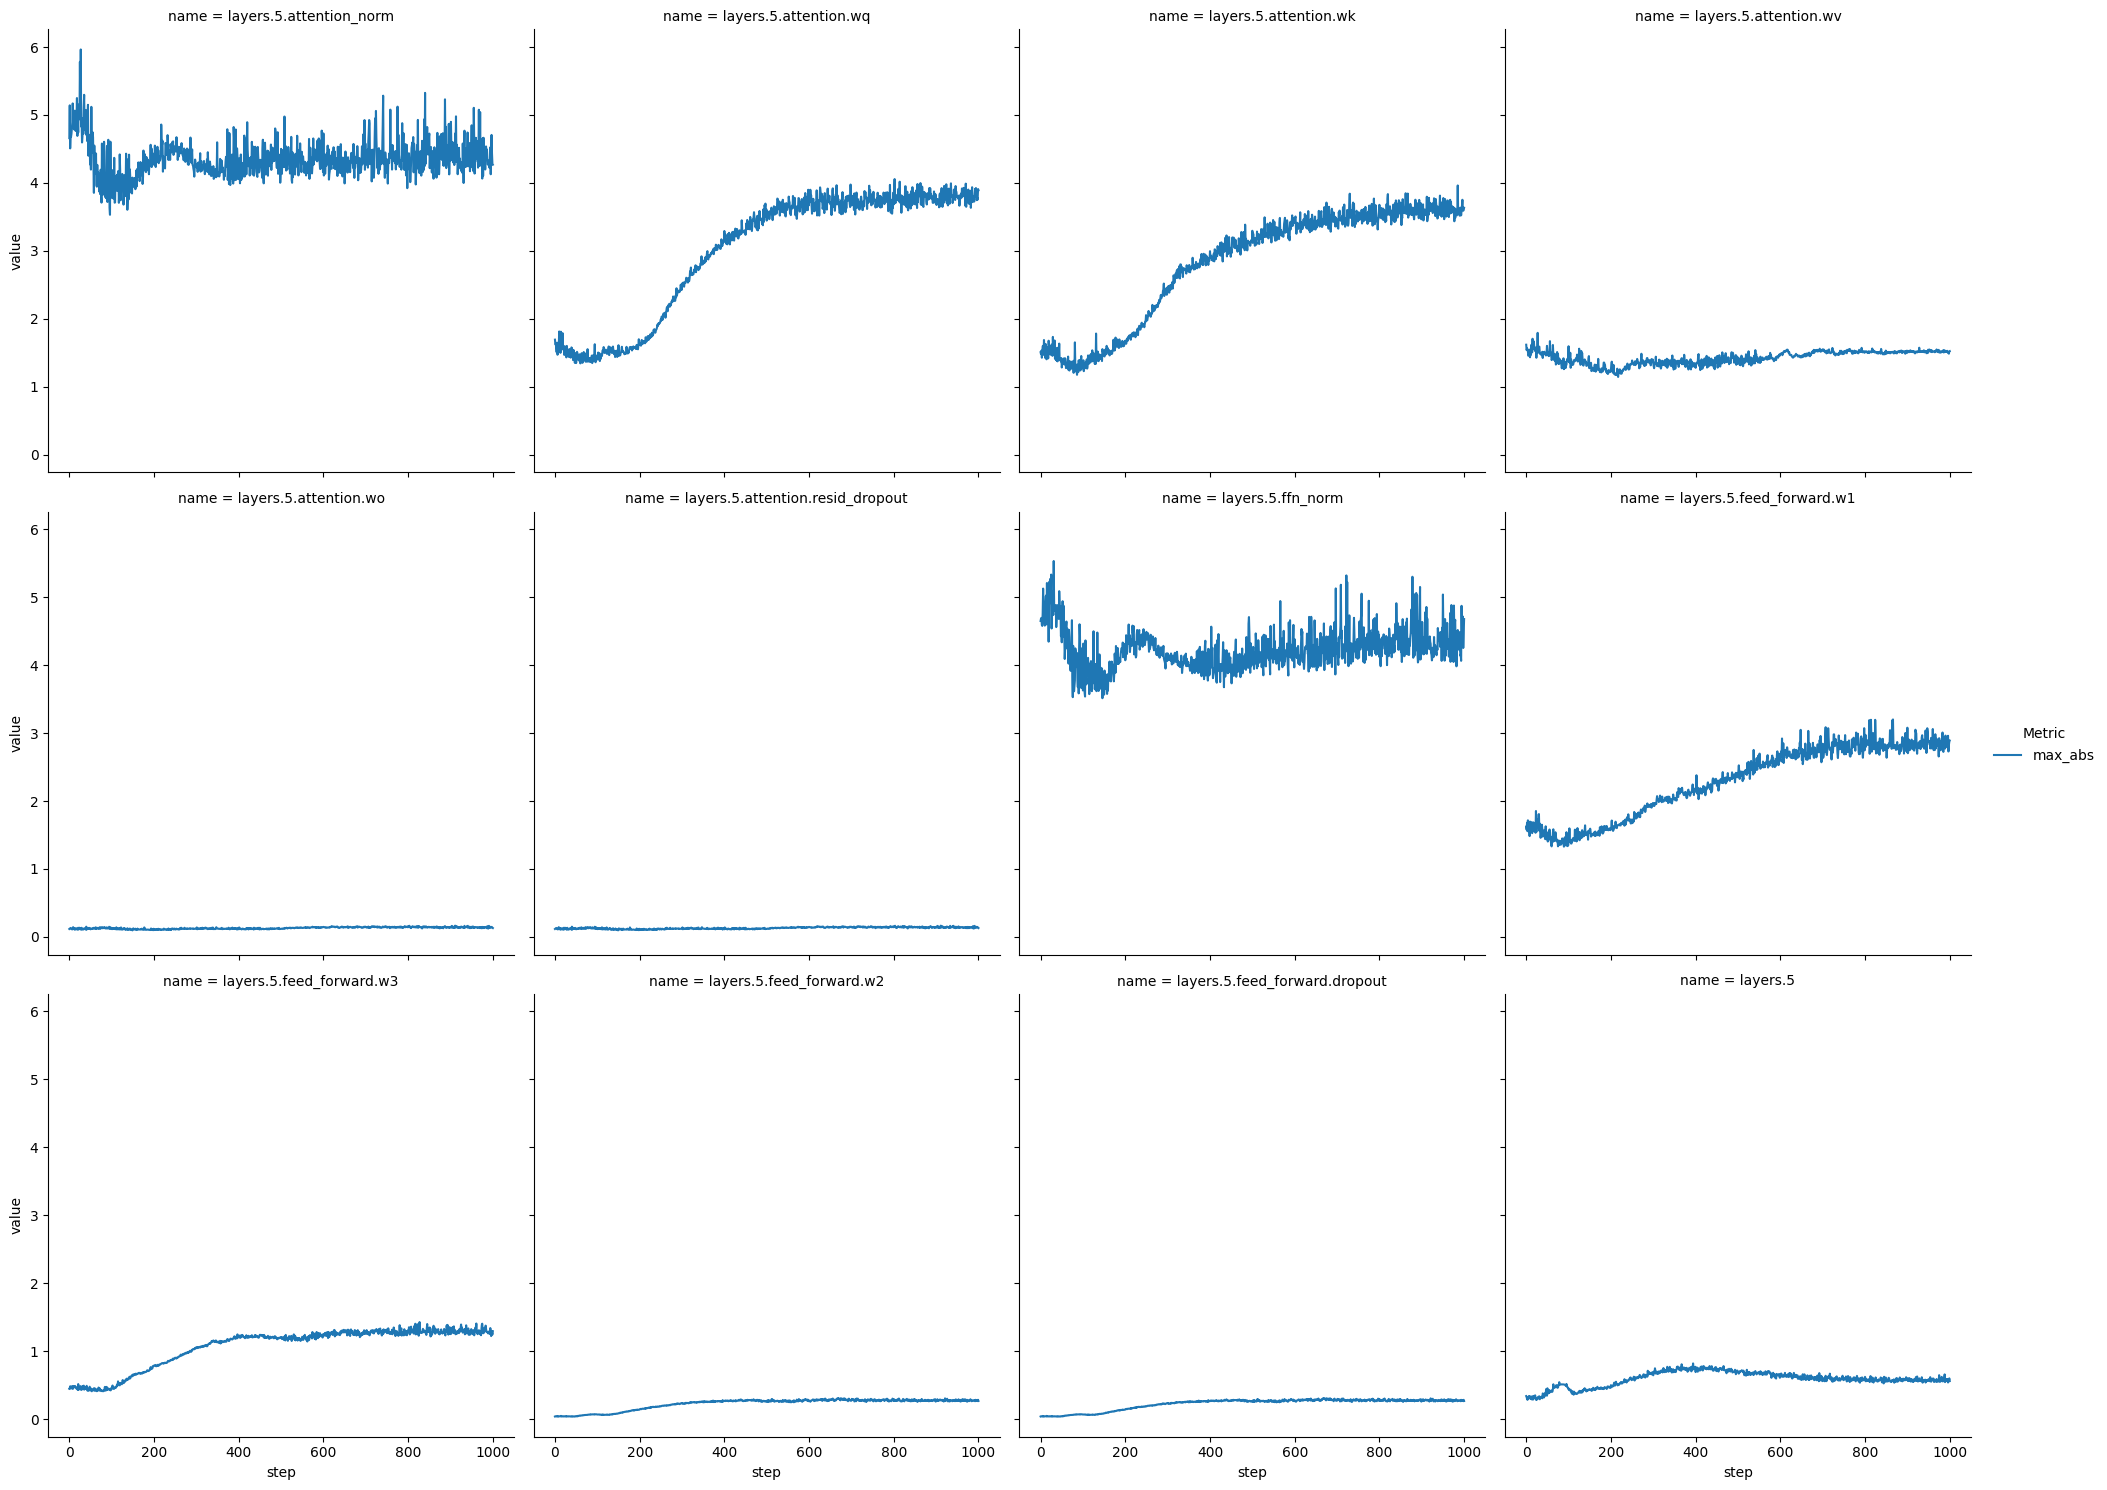

In [3]:
fg = vis.scalar_line(
    df=df,
    layer=re.compile('layers.5'),
    tt=TensorType.Activation, 
    scalar_metric='max_abs',
    col_wrap=4,
    kind='line'
)

# Doug case -> Hot spots

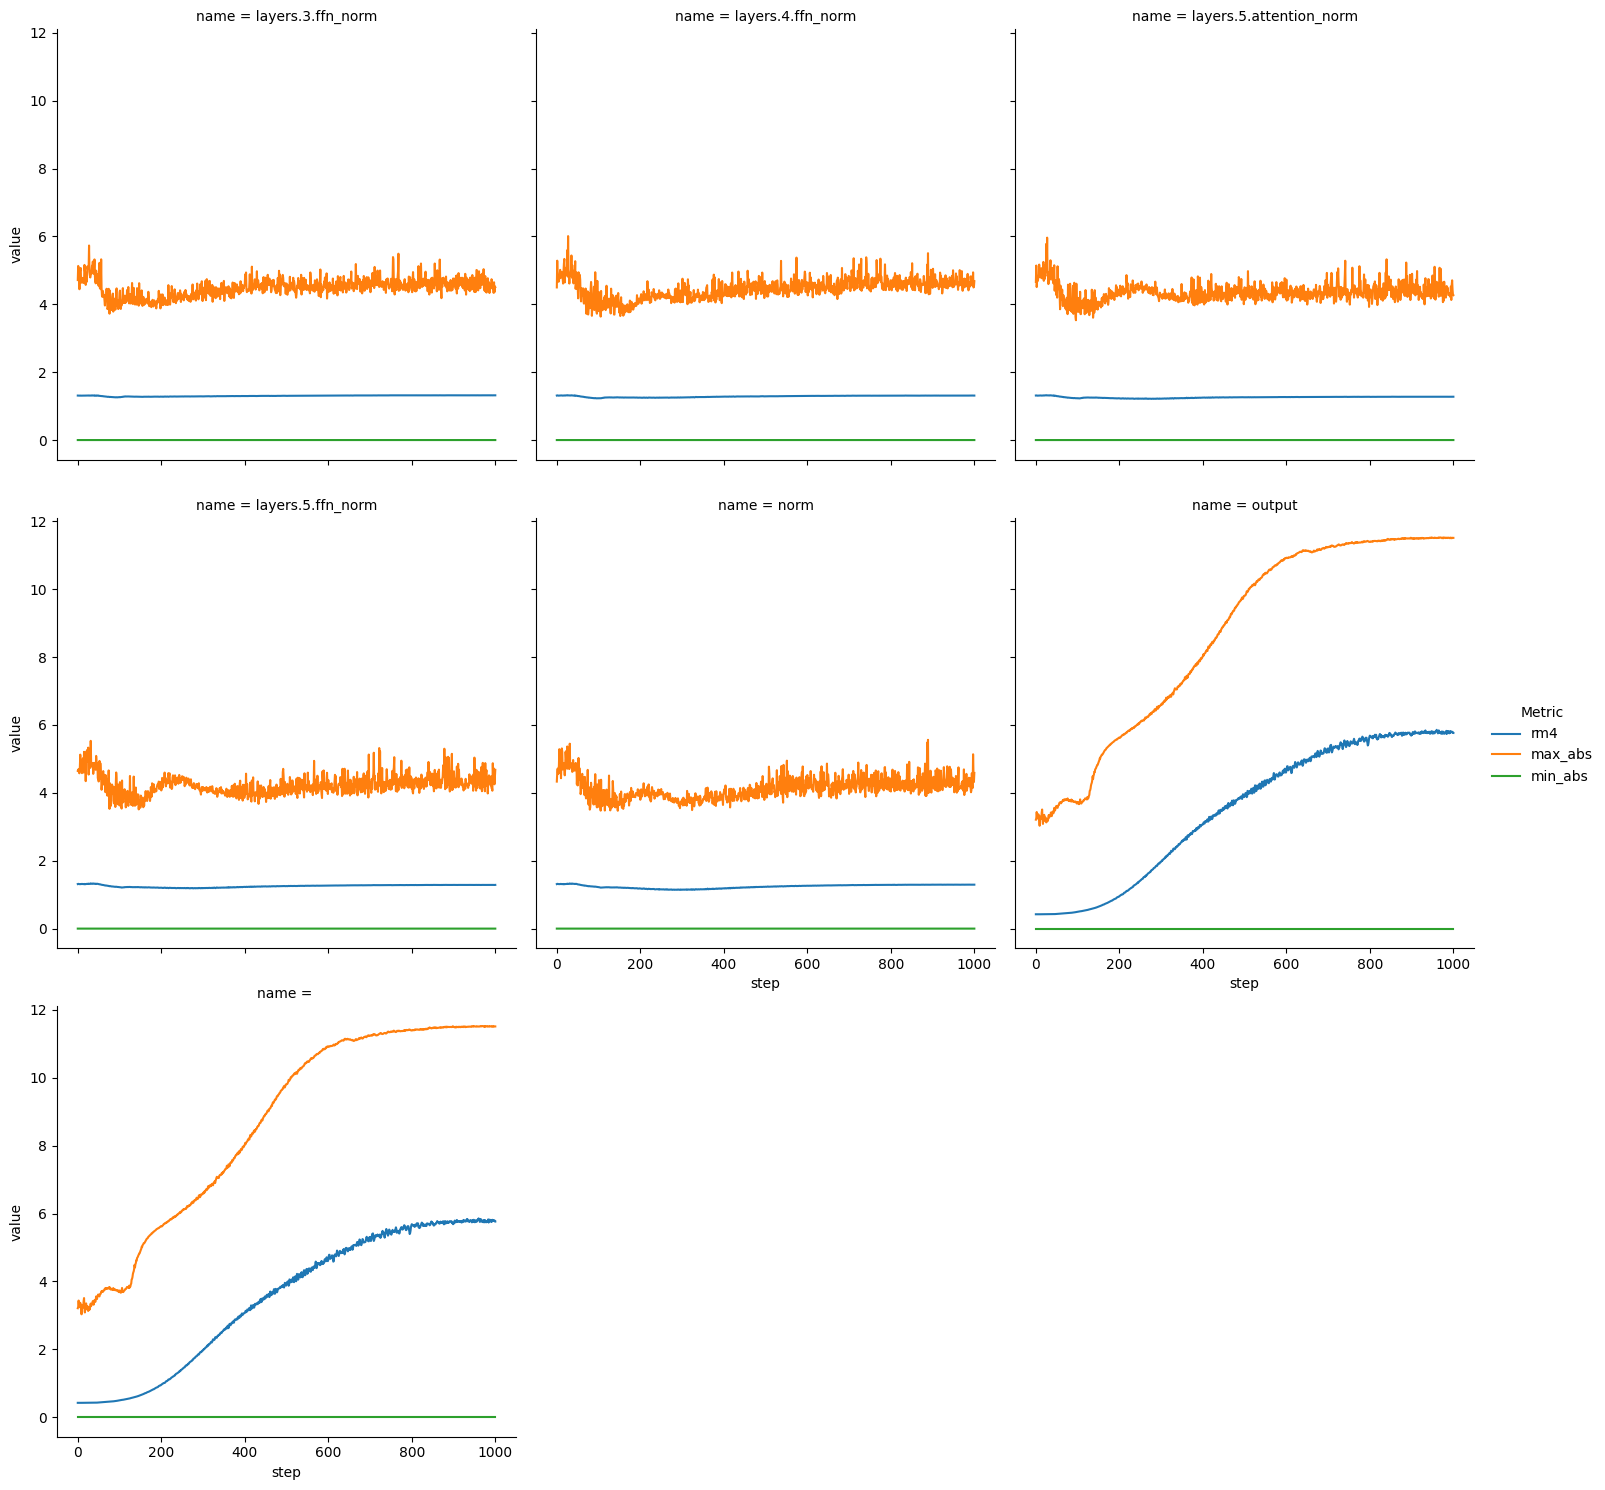

In [8]:
# find some reasonable threshold for hotspots...
thre = df.general_stats.rm4.mean() + (1.75*df.general_stats.rm4.std())

# quick pd ops to get the set of names with values above that threshold 
l_names = list(df.query(f'@df.general_stats.rm4 > {thre}').metadata.name.unique())


# visualise
fg = vis.scalar_line(
    df=df,
    layer=l_names,
    tt=TensorType.Activation, 
    scalar_metric=['rm4','max_abs', 'min_abs'],
    col_wrap=3,
    kind='line'
)